# Sample R notebook - Example Financial Analysis

In this notebook, we illustrate the use of R with several code examples showing how to gather and use financial data, as well as fit financial models, eventually with deep learning.

The code below is R code. Please make sure to execute this only after you've installed the R kernel as in the previous notebook titled `1._InstallR.ipynb`

This notebook uses the R kernel. You will find this in the launcher. 

## Check that plotting works

It's good to start by checking that plots work in the notebook so that we know the graphical support in R is working. Here we generate 1 million standard normal random variates and plot the histogram, which shows that it is normally distributed. We also overlay a grid on the plot. 

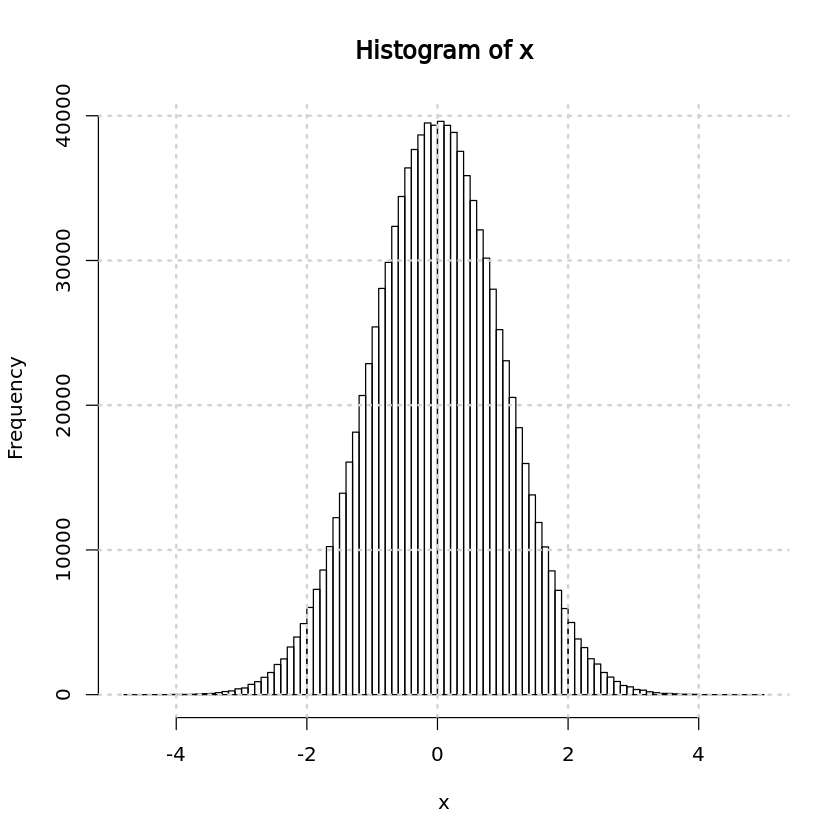

In [24]:
x = rnorm(1000000) # normal random numbers
hist(x,100) # histogram with 100 bins
grid(lwd=2) # a grid with adjusted line width

## Installing R packages

You can install multiple R packages in this notebook as follows. The `install.packages` function in R can take a list of packages, concatenated together using the `c()` function. We install below two packages: (i) `quantmod` (https://www.quantmod.com/) a financial data package, and `magrittr` (https://cran.r-project.org/web/packages/magrittr/vignettes/magrittr.html) used for piping. 

You can install these once and not every time you use this notebook. The first time you use `install.packages` you will also be required to choose a [CRAN](https://cran.r-project.org/) mirror for the download. 

In [46]:
install.packages(c("quantmod", "magrittr"))

We now use the quantmod package to download stock prices as a basic example. 

We use the S&P 500 index here. 

In [26]:
ticker = '^GSPC'

Next, we will invoke the quantmod package. Then we use the `getSymbols` function to get the chosen ticker (or tickers in a concatenated list), we then convert the table into a dataframe. 

We can examine the dataframe and also plot the adjusted prices of the ticker. 

In [27]:
library(quantmod)
getSymbols(ticker)
GSPC = as.data.frame(GSPC)

[1] "^GSPC"

In [5]:
head(GSPC)

,GSPC.Open,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Volume,GSPC.Adjusted
2007-01-03,1418.03,1429.42,1407.86,1416.60,3429160000,1416.60
2007-01-04,1416.60,1421.84,1408.43,1418.34,3004460000,1418.34
2007-01-05,1418.34,1418.34,1405.75,1409.71,2919400000,1409.71
2007-01-08,1409.26,1414.98,1403.97,1412.84,2763340000,1412.84
2007-01-09,1412.84,1415.61,1405.42,1412.11,3038380000,1412.11
2007-01-10,1408.70,1415.99,1405.32,1414.85,2764660000,1414.85


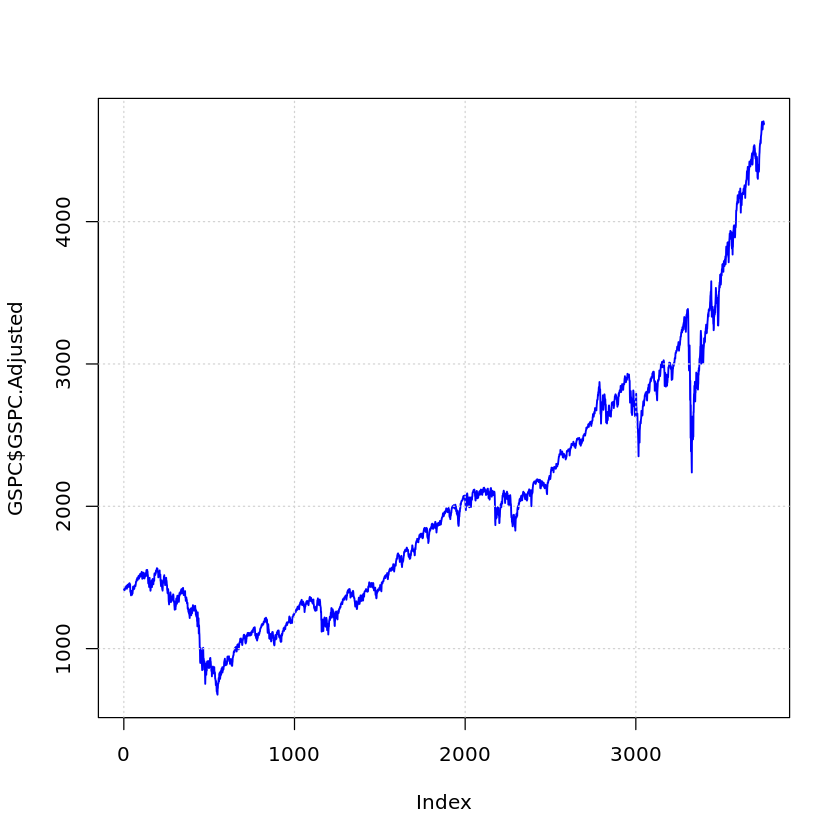

In [28]:
plot(GSPC$GSPC.Adjusted, type='l', col='blue', lwd=1.5)
grid()

We can invoke the same functionality in R using pipes with the `magrittr` package. Can you see why the package is so named? 

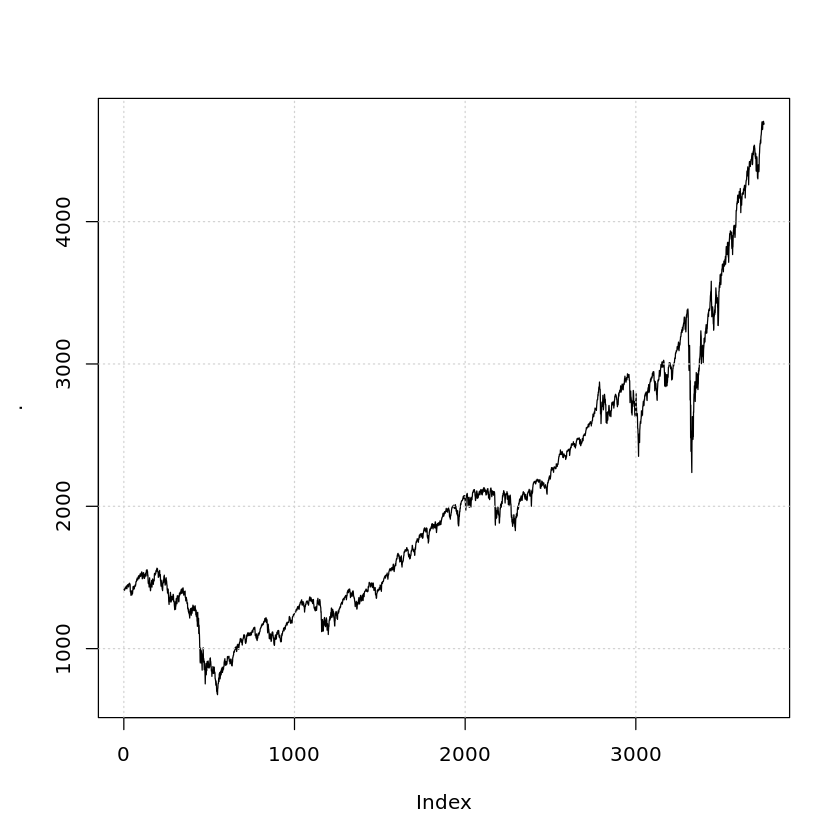

In [29]:
library(magrittr)
GSPC$GSPC.Adjusted %>% plot(type='l'); grid()

## Regression Analysis 

We can examine a simple regression of a chosen stock's return on the market index returns so that we can see how it is related to moves in the broad stock market. We choose Tesla here. 

Let's collect the two time series first for both the index and the stock. Note that we already downloaded the S&P 500 index data above. Below, we add a column of dates to that dataframe. We also download Tesla stock prices and add a date column as well. 

In [30]:
GSPC$dt = rownames(GSPC)

getSymbols('TSLA')
TSLA = as.data.frame(TSLA)
TSLA$dt = rownames(TSLA)

[1] "TSLA"

In [31]:
head(TSLA)

,TSLA.Open,TSLA.High,TSLA.Low,TSLA.Close,TSLA.Volume,TSLA.Adjusted,dt
2010-06-29,3.800,5.000,3.508,4.778,93831500,4.778,2010-06-29
2010-06-30,5.158,6.084,4.660,4.766,85935500,4.766,2010-06-30
2010-07-01,5.000,5.184,4.054,4.392,41094000,4.392,2010-07-01
2010-07-02,4.600,4.620,3.742,3.840,25699000,3.840,2010-07-02
2010-07-06,4.000,4.000,3.166,3.222,34334500,3.222,2010-07-06
2010-07-07,3.280,3.326,2.996,3.160,34608500,3.160,2010-07-07


## Merging two dataframes

We have two separate dataframes, one for GSPC and the other for TSLA. They cover different date ranges, and we wish to line up the data for the two tickers. One way to do this is to join the two dataframes on date using an intersection (inner) join, so that the rows that are retained are the ones for which the two tickers have common dates. It is really easy to do so in R using the `merge` function. The key for the join is the date column. 

In [32]:
df = merge(GSPC,TSLA,by="dt")
head(df)

dt,GSPC.Open,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Volume,GSPC.Adjusted,TSLA.Open,TSLA.High,TSLA.Low,TSLA.Close,TSLA.Volume,TSLA.Adjusted
2010-06-29,1071.10,1071.10,1035.18,1041.24,6136700000,1041.24,3.800,5.000,3.508,4.778,93831500,4.778
2010-06-30,1040.56,1048.08,1028.33,1030.71,5067080000,1030.71,5.158,6.084,4.660,4.766,85935500,4.766
2010-07-01,1031.10,1033.58,1010.91,1027.37,6435770000,1027.37,5.000,5.184,4.054,4.392,41094000,4.392
2010-07-02,1027.65,1032.95,1015.93,1022.58,3968500000,1022.58,4.600,4.620,3.742,3.840,25699000,3.840
2010-07-06,1028.09,1042.50,1018.35,1028.06,4691240000,1028.06,4.000,4.000,3.166,3.222,34334500,3.222
2010-07-07,1028.54,1060.89,1028.54,1060.27,4931220000,1060.27,3.280,3.326,2.996,3.160,34608500,3.160


## Preparing the dataframe needed for regression analysis

We only need the adjusted closing prices for each ticker, and the dates, so we take a subset of the merged dataframe. This is shown next. 

In [33]:
df = df[c("dt","GSPC.Adjusted","TSLA.Adjusted")]
names(df) = c("DATE","GSPC","TSLA")
head(df)

DATE,GSPC,TSLA
2010-06-29,1041.24,4.778
2010-06-30,1030.71,4.766
2010-07-01,1027.37,4.392
2010-07-02,1022.58,3.840
2010-07-06,1028.06,3.222
2010-07-07,1060.27,3.160


In [34]:
# DESCRIPTIVE STATISTICS
summary(df)

     DATE                GSPC           TSLA        
 Length:2873        Min.   :1023   Min.   :   3.16  
 Class :character   1st Qu.:1598   1st Qu.:  11.16  
 Mode  :character   Median :2099   Median :  46.01  
                    Mean   :2287   Mean   : 115.12  
                    3rd Qu.:2804   3rd Qu.:  66.18  
                    Max.   :4705   Max.   :1229.91  

## Convert prices to returns

We want to use regression analysis to examine the relationship of returns on the two tickers. So we convert the prices into percentage returns from one date to the next. This is easy to using the twp columns of ticker prices. Note that we create two vectors of returns. 

In [35]:
n = dim(df)[1]
gspc_ret = (df$GSPC[2:n] - df$GSPC[1:(n-1)])/df$GSPC[1:(n-1)]
tsla_ret = (df$TSLA[2:n] - df$TSLA[1:(n-1)])/df$TSLA[1:(n-1)]

## Fitting the regression

In R, ordinary least squares (OLS) regression is fitted using the function `lm` (for linear model). We want to fit the model by regressing Tesla's return on the return of the S&P 500 index. The single line of code below runs the model and the `summary` function prints out all the details of the regression. 

In [36]:
res = lm(tsla_ret ~ gspc_ret)
summary(res)


Call:
lm(formula = tsla_ret ~ gspc_ret)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.188661 -0.016457 -0.001094  0.014901  0.246938 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0017693  0.0006088   2.906  0.00369 ** 
gspc_ret    1.2900404  0.0567632  22.727  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03258 on 2870 degrees of freedom
Multiple R-squared:  0.1525,	Adjusted R-squared:  0.1522 
F-statistic: 516.5 on 1 and 2870 DF,  p-value: < 2.2e-16


Notice that the intercept is very small (0.0017) and the coefficient on the GSPC return is 1.29, which approximates what is known as the "beta" of the stock. What this means is that when the market moves by 1%, Tesla stock changes by 1.29% (up or down). So TSLA is relatively more risky than GSPC. 

Note that the t-statistics show that GSPC is statistically significant in being able to explain the return of TSLA. 

Also, see that the F-statistic has a p-value = 0, which means that the regression model provides a good fit to the data. We see that the R-square is 15%. 

It is useful to plot one series against the other to see this relationship and also plot the regression line using the output of the regression model. This is done next. 

Correlation of stock and market return:[1] 0.3905358


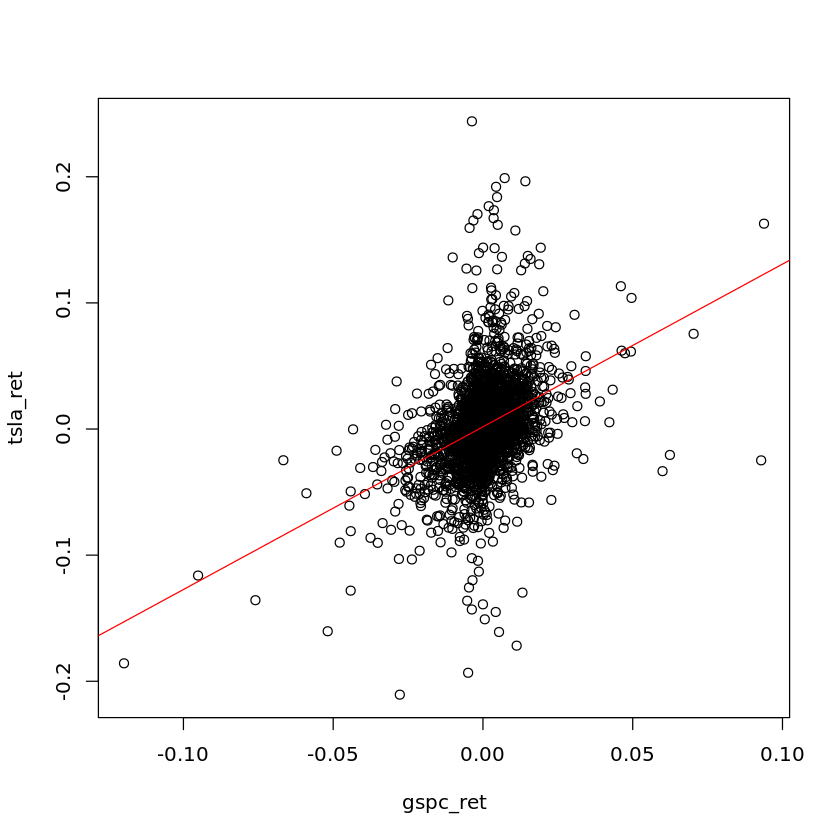

In [37]:
plot(gspc_ret, tsla_ret)
cat("Correlation of stock and market return:"); print(cor(gspc_ret, tsla_ret))
abline(res, col="red")

Next, let's explore a different topic to see how functions are written in R, and to implement some deep learning as well. 

## Pricing Equity Options 

[Options](https://www.investopedia.com/terms/o/option.asp) are traded in large numbers. The basic model for pricing options is the famous Black-Scholes equation. The price of a call option in this model is given by the following formula (see: https://www.investopedia.com/terms/b/blackscholes.asp)

$$
C=Se^{-qT} N(d_1) - Ke^{-rT}⋅N(d_2)
$$

where

$$
d_1=\frac{\ln(S/K)+(r-q+v^2/2)T]}{v\sqrt{T}}
$$

and $d_2=d_1-v\sqrt{T}$. 

Here $S$ is the stock price, $K$ is the strike price, $T$ is option maturity in years, $v$ is the annualized volatility of the stock, and $r$ is the continuous risk free rate of interest for maturity $T$. Finally, $q$
is the annual dividend rate, assuming it is paid continuously.

Likewise, the formula for a put option is

$$
P=Ke^{-rT}N(-d_2) - Se^{-qT}N(-d_1)
$$

and $d_1$ and $d_2$ are the same as for the call option.

We build a simple R function to price options. It returns both the price of a call and a put option for the input parameters. 

In [38]:
#Generate Black-Scholes values
BS = function(S,K,T,v,rf,dv) {
    d1 = (log(S/K) + (rf-dv+0.5*v^2)*T)/(v*sqrt(T))
    d2 = d1 - v*sqrt(T)
    bscall = S*exp(-dv*T)*pnorm(d1) - K*exp(-rf*T)*pnorm(d2)
    bsput = -S*exp(-dv*T)*pnorm(-d1) + K*exp(-rf*T)*pnorm(-d2)
    res = c(bscall,bsput)
}

We install `ggplot` which is a popular package in R. See: https://ggplot2.tidyverse.org/

This will be used to plot the option prices generated from this function. 

In [47]:
install.packages("ggplot2")
library(ggplot2)

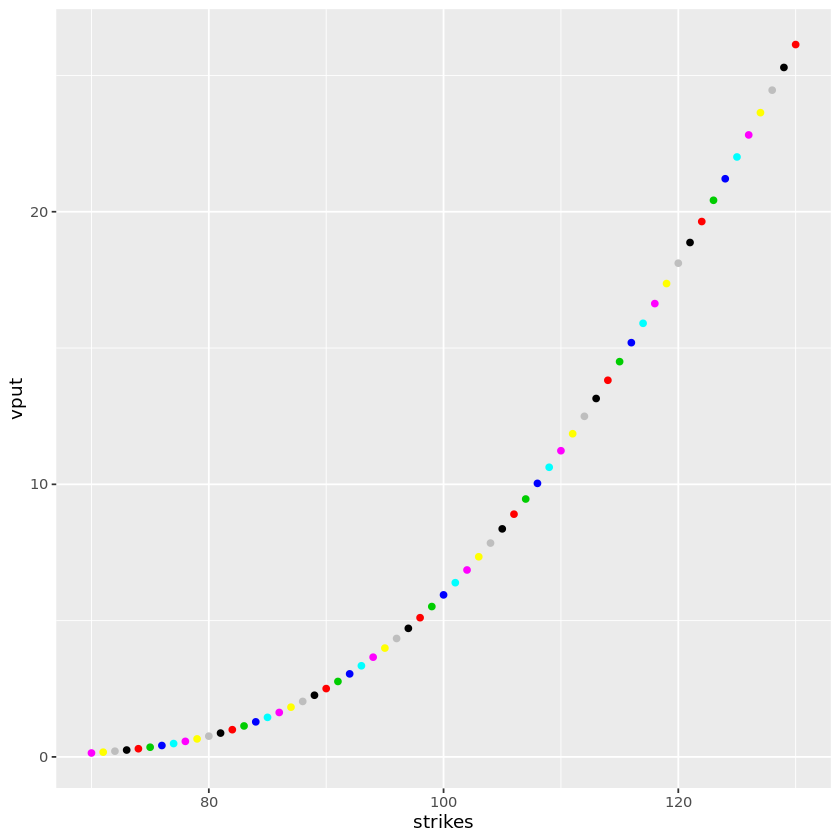

In [40]:
# Add in the parameter values for pricing options
S = 100
K = 100
T = 1
v = 0.20
rf = 0.05
dv = 0.01

# Create null vectors to hold the option prices
vcall = NULL; vput = NULL
strikes = seq(K-30,K+30)

# Loop to compute all option prices
for (k in strikes) {
  vcall = c(vcall,BS(S,k,T,v,rf,dv)[1])
  vput = c(vput,BS(S,k,T,v,rf,dv)[2])
}

# Construct a dataframe with the option values
df = data.frame(strikes,vcall,vput)
ggplot(df,aes(x=strikes,y=vput)) + geom_point(color=strikes)

This shows the expected relationship of put prices to the strike price of the option, i.e., as the strike is increase, ceteris paribus, the price of puts increases. 

## Create a synthetic dataset of option prices for a deep learning example

We now create a synthetic dataset of option prices and inputs to fit a deep learning model to "learn" the Black-Scholes option pricing model from synthetically generated data. We generate 100,000 option prices. The six input parameters are chosen randomly and then the call prices are generated from the random input parameters. 

In [41]:
n = 100000
S = runif(n, 80, 120) # Uniform random numbers between 80
K = runif(n, 80, 120) 
T = runif(n, 0.25, 2)
v = runif(n, 0.05, 0.25)
rf = runif(n, 0.01, 0.05)
dv = runif(n, 0.005, 0.02)

In [42]:
callPrices = NULL
for (i in 1:n) {
      callPrices = c(callPrices,BS(S[i],K[i],T[i],v[i],rf[i],dv[i])[1])
}
df = data.frame(S, K, T, v, rf, dv, callPrices)
head(df)

S,K,T,v,rf,dv,callPrices
92.45267,86.48318,0.8339456,0.06401861,0.01174064,0.017899846,5.830030
109.37121,84.52778,0.8588396,0.24332395,0.04839114,0.015831798,27.833251
103.00767,92.33301,1.8619172,0.20795091,0.03477433,0.016321400,18.519266
85.46472,99.33980,1.3971280,0.24506076,0.01582442,0.013232990,5.090455
82.75917,85.48530,1.6095747,0.16418166,0.01132484,0.014381646,5.406382
85.97294,87.77193,1.2422152,0.09356906,0.04713541,0.005021026,4.986066


Above, we see the dataframe of input values and in the last column, the option price generated by the Black-Scholes model. 